In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('estimates_300MeV_batches_x0y0zn1000_test.dict','rb') as f:
    est = pickle.load(f)

In [3]:
est.keys()

dict_keys(['minimum_found', 'x', 'y', 'z', 'length', 't', 'est_fcn', 'true_fcn', 'cx', 'cy'])

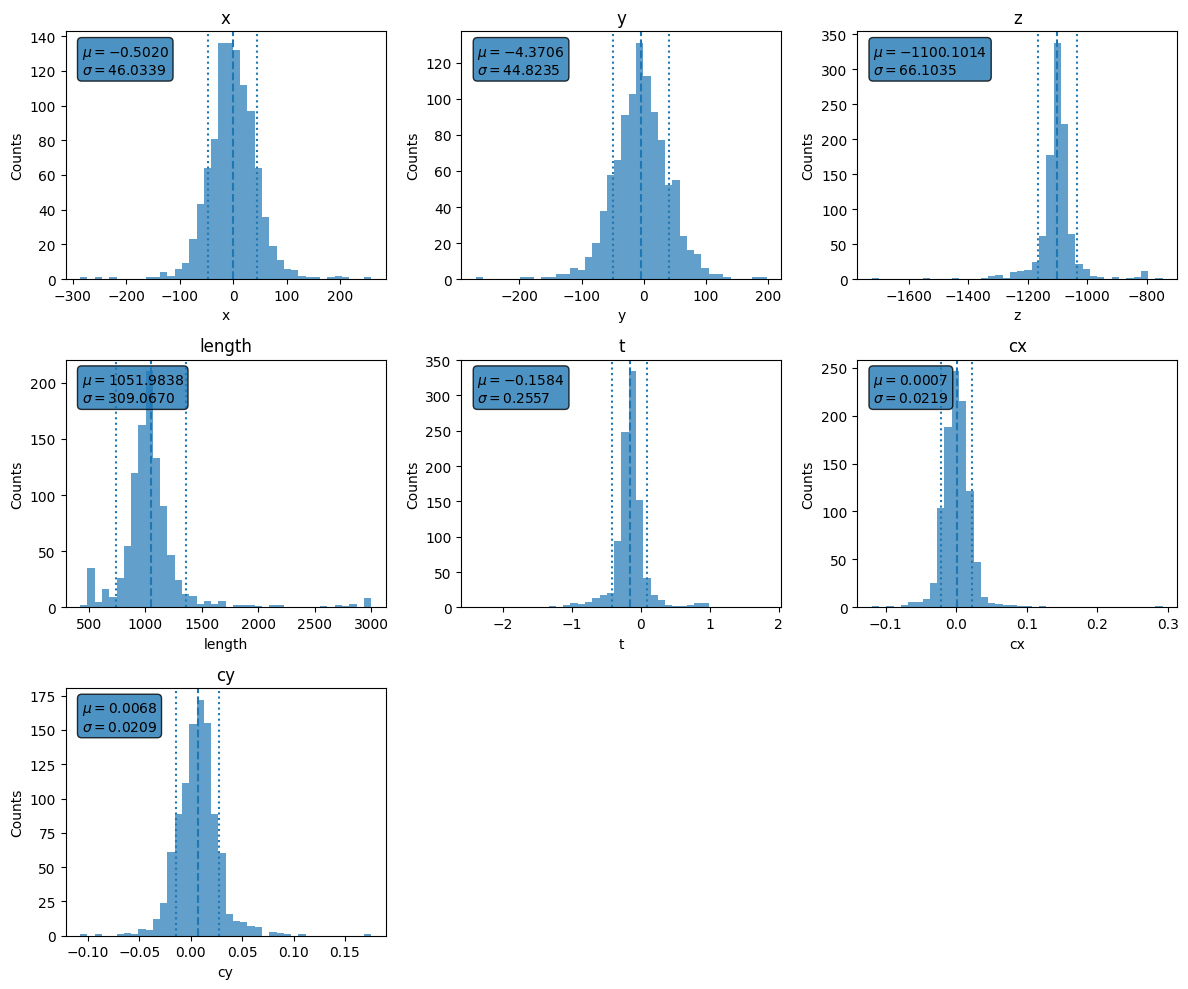

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = est   # replace with your dictionary
keys_to_plot = ['x', 'y', 'z', 'length', 't', 'cx', 'cy']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, key in enumerate(keys_to_plot):
    ax = axes[i]
    
    values = np.asarray(data[key])
    mean = np.mean(values)
    std = np.std(values)
    
    ax.hist(values, bins=40, alpha=0.7)
    
    # Mean and ±1σ lines
    ax.axvline(mean, linestyle='--')
    ax.axvline(mean + std, linestyle=':')
    ax.axvline(mean - std, linestyle=':')
    
    ax.set_title(key)
    ax.set_xlabel(key)
    ax.set_ylabel("Counts")
    
    # Text box inside plot (axes-relative coordinates)
    textstr = f"$\\mu = {mean:.4f}$\n$\\sigma = {std:.4f}$"
    
    ax.text(
        0.05, 0.95, textstr,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.8)
    )

# Remove unused axes
for j in range(len(keys_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()